# Computational Finance
## Series 10
Tientso Ning

In [2]:
import numpy as np
from scipy.stats import norm
import pandas as pd
from scipy.misc import derivative
import matplotlib.pyplot as plt

In [35]:
#Black Scholes Model from Series 9
def black_scholes (S, K, r, t):
    '''
    Where S is the current stock price
    K is the strike prices
    r is the risk-free interest rate
    t is the time to maturity
    under a Normal distribution
    '''
    
    v = 0.2 #set volatility at 20% for our problem
    
    d1 = (np.log(S/K)+((r+(v**2)/2)*t))/(v*np.sqrt(t))
    d2 = d1-(v*np.sqrt(t))
    return K*np.exp(-1*r*t)*norm.cdf(-d2)-S*norm.cdf(-d1)

/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


Text(0, 0.5, 'Put Price')

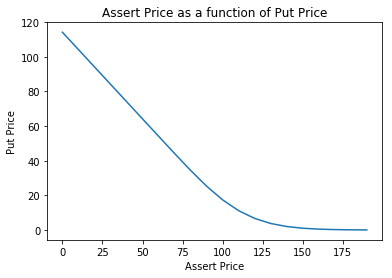

In [37]:
#plot the evolution of the put price as a function of the initial assert price S_0
assert_price = []
put_price = []
for i in range(20):
    S = i*10
    assert_price.append(S)
    V = black_scholes(S, 120, 0.05, 1)
    put_price.append(V)

plt.plot(assert_price, put_price)
plt.title("Assert Price as a function of Put Price")
plt.xlabel("Assert Price")
plt.ylabel("Put Price")

/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


Text(0, 0.5, 'Delta')

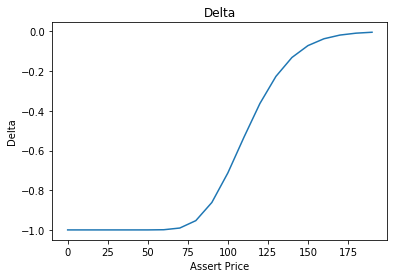

In [38]:
#plot the delta for this put
def delta(S, K, r, t):
    '''
    Where S is the current stock price
    K is the strike prices
    r is the risk-free interest rate
    t is the time to maturity
    under a Normal distribution
    '''
    v = 0.2 #set volatility at 20% for our problem
    
    d1 = (np.log(S/K)+((r+(v**2)/2)*t))/(v*np.sqrt(t))
    
    return norm.cdf(d1)-1

deltas = []
for i in range(20):
    S = i*10
    D = delta(S, 120, 0.05, 1)
    deltas.append(D)

plt.plot(assert_price, deltas)
plt.title("Delta")
plt.xlabel("Assert Price")
plt.ylabel("Delta")

Delta graph shows us that there is a decrease in responsiveness to the price change of the underlying when the price approaches 150~175 range, as the delta is shown to be closer to zero.

/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/kense/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0, 0.5, 'Gamma')

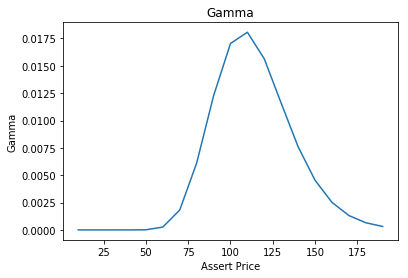

In [39]:
#plot the gamma for this put
def gamma(S,K,r,t):
    '''
    Where S is the current stock price
    K is the strike prices
    r is the risk-free interest rate
    t is the time to maturity
    under a Normal distribution
    '''
    v = 0.2 #set volatility at 20% for our problem
    
    d1 = (np.log(S/K)+((r+(v**2)/2)*t))/(v*np.sqrt(t))
    
    return norm.pdf(d1)/(S*v*np.sqrt(t))

gammas = []
for i in range(20):
    S = i*10
    G = gamma(S, 120, 0.05, 1)
    gammas.append(G)

plt.plot(assert_price, gammas)
plt.title("Gamma")
plt.xlabel("Assert Price")
plt.ylabel("Gamma")

The gamma graph shows that assert prices from the range 75~150 shows a higher fluctuation of delta values, meaning that the deltas are more prone to change in this range, and thus riskier.

# Additional questions
Suppose the asset price is at $S_{0} = 100$ and we sell $1000$ puts.
* We want to be $\Delta$-neutralized, which position should we have?

* Suppose the price at time $t + \epsilon$ is $105$, what is the payoff of this strategy?

* What about $95$?

In [24]:
#First determine the delta at price 100, and the gamma
print(delta(100,120,0.05,1))
print(gamma(100,120,0.05,1))

-0.7128083620948729
0.017036921138505086


"We want to be $\Delta$-neutralized, which position should we have?"

- Since the delta is $-0.712$ and we sell $1000$ puts, to hedge this delta we need to sell $1000*0.712 = 712$ shares

"Suppose the price goes to $105$"

$-214.2727395978859$

"What about 95?"

$-209.5757230608392$


In [47]:
712*(100-105) + 1000*(17.3950083566465-14.049281096244385)

-214.2727395978859

In [48]:
712*(100-95) + 1000*(17.3950083566465-21.16458407970734)

-209.5757230608392

### Additional calculations to be $\Delta$-neutral
- Since the gamma is at $0.017$ that means for every dollar the price changes ($105-100 = 5$) the delta changes by $0.017$. This insinuates that the delta will change by $5*0.017=0.085$. That would cause the delta to now be at $-0.7128083620948729+0.085=-0.62780836209$. That means that we would now only need to sell $1000*0.627=627$ shares, and we can buy back $712-627=85$ shares.
- Since the gamma is at $0.017$, the delta will change by $-0.085$. That would cause the delta to now be at $-0.79780836209$. This means we would need to sell $1000*0.797=797$ shares, and we will need to sell additional $797-712=85$ shares.